<a href="https://colab.research.google.com/github/KOWSALYAAARU/test_app/blob/main/time_series_forecasting_casestudy_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')


from datetime import datetime
from numpy import log
from pandas import Series

In [ ]:
##1st stage i.e EDA

In [ ]:
dataset = pd.read_csv('airline_passengers.csv')
dataset.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
dataset = pd.read_csv('airline_passengers.csv')
dataset.head(10)

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [ ]:
#Check Missing Data
dataset.isnull().sum()

,0
Month,0
Thousands of Passengers,0


In [ ]:
# Information of the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    144 non-null    object
 1   Thousands of Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
dataset['Month']=pd.to_datetime(dataset['Month'])
dataset.head()

,Month,Thousands of Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [ ]:
# set the datetime column('month' in our case) as the index for our data as it helps us to quickly filter our data and perform various operations
dataset.set_index('Month',inplace=True)
dataset.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
### 2st stage after EDA

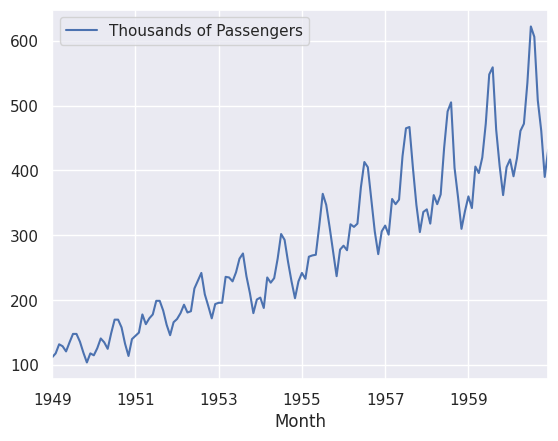

In [ ]:
dataset.plot()
plt.show()

In [ ]:
dataset.columns

Index(['Thousands of Passengers'], dtype='object')

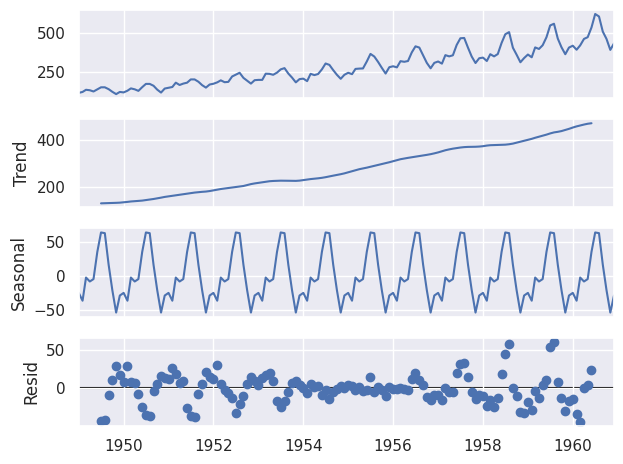

In [ ]:
## decompositions of data to check trend,seasonality and irregular time series

from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(dataset)
decompose.plot()
plt.show()

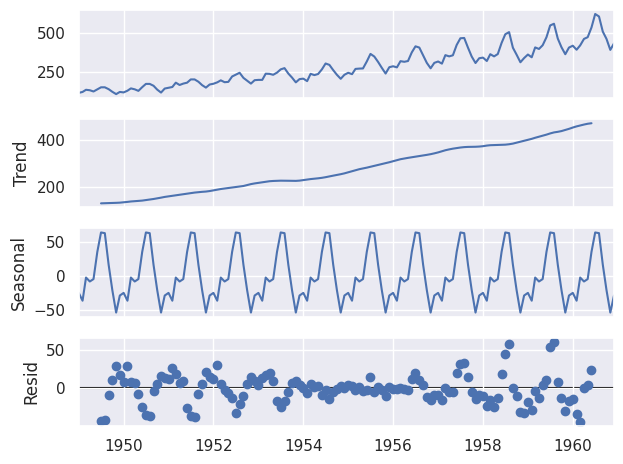

In [ ]:
decompose = seasonal_decompose(dataset,model='additive')
decompose.plot()
plt.show()

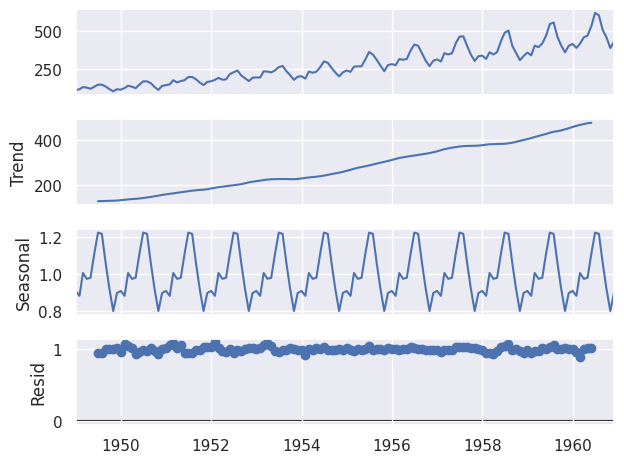

In [ ]:
decompose1=seasonal_decompose(dataset,model='multiplicative')
decompose1.plot()
plt.show()

Check autocorrelation part-Durbin Watson Test

In [ ]:
import statsmodels.api as sm
sm.stats.durbin_watson(dataset)

array([0.0121528])

Augmented dickey fuller test

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adfuller(dataset)

(0.8153688792060498,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [ ]:

def check_adftest(timeseries):
  result = adfuller(timeseries)
  labels = ['ADF Test Statistic','p-value','#Lags Used','Number Of Observations Used']
  for i,j in zip(result,labels):
   print(j + "-->" + str(i))

  if result [i] <= 0.05:
     print("Reject Null Hypothesis and my time series is stationary")
  else:
    print("Accept Null Hypothesis and my time series is  non stationary")


In [ ]:
check_adftest(dataset)

ADF Test Statistic-->0.8153688792060498
p-value-->0.991880243437641
#Lags Used-->13
Number Of Observations Used-->130


IndexError: tuple index out of range

In [ ]:
## how to convert non stationary data to statinary data

In [ ]:
dataset['1st_diff'] = dataset['Thousands of Passengers'] - dataset['Thousands of Passengers'].shift(1)
dataset.head()

,Thousands of Passengers,1st_diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [ ]:
# dataset['Thousands of Passengers'].shift(-1)

In [ ]:
check_adftest(dataset['1st_diff'].dropna())

ADF Test Statistic-->-2.8292668241700047
p-value-->0.05421329028382478
#Lags Used-->12
Number Of Observations Used-->130


IndexError: tuple index out of range

<Axes: xlabel='Month'>

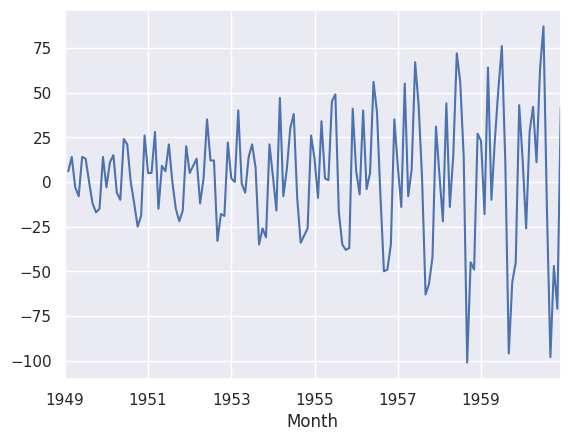

In [ ]:
dataset['1st_diff'].plot()

In [ ]:
## 2nd difference as well for stationarity check

dataset['2nd_diff'] = dataset['1st_diff'] - dataset['1st_diff'].shift(1)
dataset.head()

,Thousands of Passengers,1st_diff,2nd_diff
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0


In [ ]:
check_adftest(dataset['2nd_diff'].dropna())

ADF Test Statistic-->-16.384231542468513
p-value-->2.7328918500142026e-29
#Lags Used-->11
Number Of Observations Used-->130


IndexError: tuple index out of range

<Axes: xlabel='Month'>

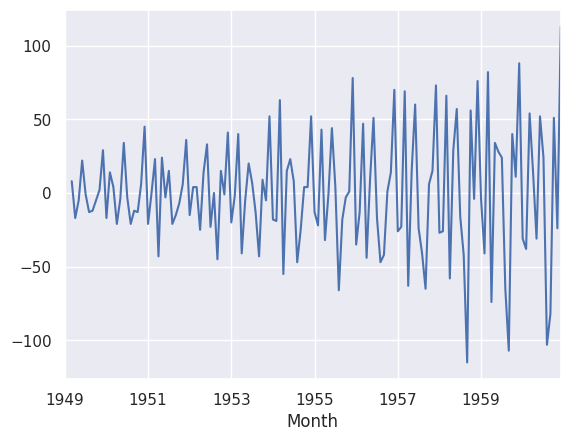

In [ ]:
dataset['2nd_diff'].plot()

Check Autocorrelation and Partial Autocorrelation


In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

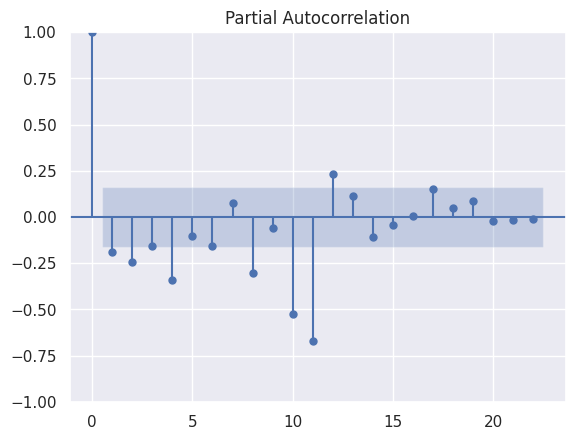

In [ ]:
#partial_autocorrelation
plot_pacf(dataset['2nd_diff'].dropna())
plt.show()

In [ ]:
## the light blue band above and below the X axis is the significance band

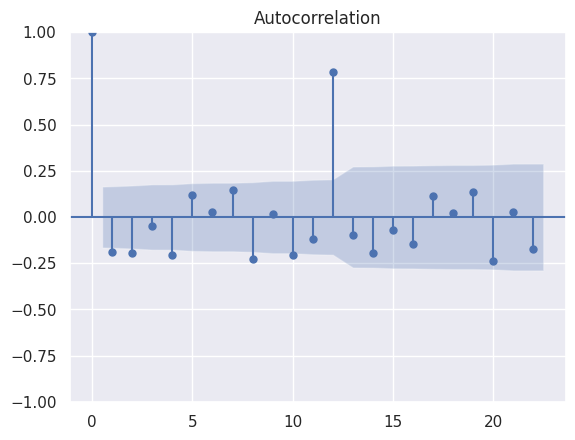

In [ ]:
plot_acf(dataset['2nd_diff'].dropna())
plt.show()

In [ ]:
## no. of people travelling january of an year are highly autocorrelated with no. of people travelling in december (i.e after 12 months)

In [ ]:
## had our 1st and 2nd difference also been non stationary, we could have tried a seasonal column. for ex:

dataset['Seasonality'] = dataset['Thousands of Passengers'] - dataset['Thousands of Passengers'].shift(12)
dataset.head(20)

,Thousands of Passengers,1st_diff,2nd_diff,Seasonality
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
1949-06-01,135,14.0,22.0,NaN
1949-07-01,148,13.0,-1.0,NaN
1949-08-01,148,0.0,-13.0,NaN
1949-09-01,136,-12.0,-12.0,NaN


In [ ]:
check_adftest(dataset['Seasonality'].dropna())

ADF Test Statistic-->-3.383020726492481
p-value-->0.011551493085514952
#Lags Used-->1
Number Of Observations Used-->130


IndexError: tuple index out of range

In [ ]:
##### class - 2 ( Sarima model creation , auto-arima , Prophet model creation and forecasting)

In [ ]:
""" p = 4
q=2

d = 2

"""

' p = 4\nq=2\n\nd = 2\n\n'

In [ ]:
dataset.head()

,Thousands of Passengers,1st_diff,2nd_diff,Seasonality
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN


In [ ]:
##### model building Sarima

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [ ]:
model = sm.tsa.statespace.SARIMAX(dataset['Thousands of Passengers'], order = (4,2,2), seasonal_order = (4,2,2,12))

result = model.fit()
print(result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:            Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(4, 2, 2)x(4, 2, 2, 12)   Log Likelihood                -469.031
Date:                            Mon, 19 Aug 2024   AIC                            964.062
Time:                                    05:29:46   BIC                           1000.081
Sample:                                01-01-1949   HQIC                           978.687
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2347      0.473     -2.609      0.009      -2.162      -0.307
ar.L2         -0.5268      0.280   

In [ ]:
### random values of p,d,q will give a poor AIC and thus a poor forecast

"""model = sm.tsa.statespace.SARIMAX(dataset['Thousands of Passengers'], order = (0,4,6), seasonal_order = (3,2,1,12))

result = model.fit()
print(result.summary())"""

"model = sm.tsa.statespace.SARIMAX(dataset['Thousands of Passengers'], order = (0,4,6), seasonal_order = (3,2,1,12))\n\nresult = model.fit()\nprint(result.summary())"

In [ ]:
dataset.tail(20)

,Thousands of Passengers,1st_diff,2nd_diff,Seasonality
Month,,,,
1959-05-01,420,24.0,34.0,57.0
1959-06-01,472,52.0,28.0,37.0
1959-07-01,548,76.0,24.0,57.0
1959-08-01,559,11.0,-65.0,54.0
1959-09-01,463,-96.0,-107.0,59.0
1959-10-01,407,-56.0,40.0,48.0
1959-11-01,362,-45.0,11.0,52.0
1959-12-01,405,43.0,88.0,68.0
1960-01-01,417,12.0,-31.0,57.0


In [ ]:
dataset['Forecast'] = result.predict(start = 130, end = 144, dynamic = True)

In [ ]:
dataset.tail(20)

,Thousands of Passengers,1st_diff,2nd_diff,Seasonality,Forecast
Month,,,,,
1959-05-01,420,24.0,34.0,57.0,NaN
1959-06-01,472,52.0,28.0,37.0,NaN
1959-07-01,548,76.0,24.0,57.0,NaN
1959-08-01,559,11.0,-65.0,54.0,NaN
1959-09-01,463,-96.0,-107.0,59.0,NaN
1959-10-01,407,-56.0,40.0,48.0,NaN
1959-11-01,362,-45.0,11.0,52.0,351.287428
1959-12-01,405,43.0,88.0,68.0,381.354413
1960-01-01,417,12.0,-31.0,57.0,397.417218


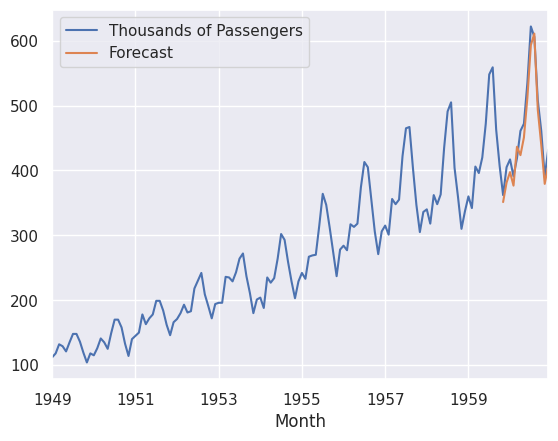

In [ ]:
dataset[['Thousands of Passengers','Forecast']].plot()
plt.show()

In [ ]:
#### Forecasting for next 5 years for the airline company

In [ ]:
from pandas.tseries.offsets import DateOffset
future_date = [dataset.index[-1] + DateOffset(months = x) for x in range(0,61)]

In [ ]:
future_date

[Timestamp('1960-12-01 00:00:00'),
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00'),
 Timestamp('1962-12-01 00:00:00'),
 Timestamp('1963-01-01 00:00:00'),
 Timestamp('1963-02-01 00:00:00'),
 Timestamp('1963-03-01 00:00:00'),
 Timestamp('1963-04-

In [ ]:
future_date_df = pd.DataFrame(index = future_date[1:],columns = dataset.columns)

In [ ]:
future_date_df.tail()

,Thousands of Passengers,1st_diff,2nd_diff,Seasonality,Forecast
1965-08-01,NaN,NaN,NaN,NaN,NaN
1965-09-01,NaN,NaN,NaN,NaN,NaN
1965-10-01,NaN,NaN,NaN,NaN,NaN
1965-11-01,NaN,NaN,NaN,NaN,NaN
1965-12-01,NaN,NaN,NaN,NaN,NaN


In [ ]:
final_df = pd.concat([dataset,future_date_df])
final_df.tail()

,Thousands of Passengers,1st_diff,2nd_diff,Seasonality,Forecast
1965-08-01,NaN,NaN,NaN,NaN,NaN
1965-09-01,NaN,NaN,NaN,NaN,NaN
1965-10-01,NaN,NaN,NaN,NaN,NaN
1965-11-01,NaN,NaN,NaN,NaN,NaN
1965-12-01,NaN,NaN,NaN,NaN,NaN


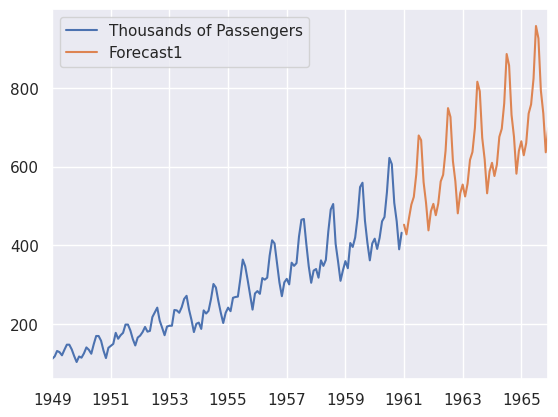

In [ ]:
final_df['Forecast1'] = result.predict(start = 144,end = 204, dynamic = True)
final_df[['Thousands of Passengers','Forecast1']].plot()
plt.show()

In [ ]:
final_df.shape

(204, 6)

In [ ]:
#### APPROACH NO. -2 (SYSTEM WILL CHECK FOR BEST AIC VALUES)


#### we have added the p,d,q values for trend and p,d,q for seasonality in a manual way,
#### now we are going to see the how can compare multiple combinations automatically using code ('itertools')

In [ ]:
import itertools

In [ ]:
p = d = q = range(0,2) ### try for higher range at home

pdq = list(itertools.product(p,d,q)) ## trend
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))] ## seasonality

In [ ]:
print('p = ', p)
print('d = ', d)
print('q = ', q)

p =  range(0, 2)
d =  range(0, 2)
q =  range(0, 2)


In [ ]:
pdq


[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [ ]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [ ]:
aic_list = []

for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      model = sm.tsa.statespace.SARIMAX(dataset['Thousands of Passengers'], order = param, seasonal_order = param_seasonal)
      result = model.fit()
      print(f'Arima {param} * {param_seasonal} - AIC: {result.aic}')
      aic_list.append(result.aic)
    except:
      continue

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

Arima (0, 0, 0) * (0, 0, 0, 12) - AIC: 2057.8473380286773
Arima (0, 0, 0) * (0, 0, 1, 12) - AIC: 1906.6182628553865


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (0, 0, 0) * (0, 1, 0, 12) - AIC: 1324.95414143452
Arima (0, 0, 0) * (0, 1, 1, 12) - AIC: 1274.6125808400311
Arima (0, 0, 0) * (1, 0, 0, 12) - AIC: 1501.3197637495437


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (0, 0, 0) * (1, 0, 1, 12) - AIC: 1451.3003770979967


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (0, 0, 0) * (1, 1, 0, 12) - AIC: 1221.2430261678046


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (0, 0, 0) * (1, 1, 1, 12) - AIC: 1176.9819619668733


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (0, 0, 1) * (0, 0, 0, 12) - AIC: 1870.3044202672252


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (0, 0, 1) * (0, 0, 1, 12) - AIC: 1723.6459590088593


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (0, 0, 1) * (0, 1, 0, 12) - AIC: 1214.0663078502234


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (0, 0, 1) * (0, 1, 1, 12) - AIC: 1189.8271589563694


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (0, 0, 1) * (1, 0, 0, 12) - AIC: 1393.4548118713487


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (0, 0, 1) * (1, 0, 1, 12) - AIC: 1387.805135700987


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (0, 0, 1) * (1, 1, 0, 12) - AIC: 1161.83954796309


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (0, 0, 1) * (1, 1, 1, 12) - AIC: 1120.2012219911808
Arima (0, 1, 0) * (0, 0, 0, 12) - AIC: 1413.9091174789412
Arima (0, 1, 0) * (0, 0, 1, 12) - AIC: 1302.6902704806207


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

Arima (0, 1, 0) * (0, 1, 0, 12) - AIC: 1031.5081081696567


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (0, 1, 0) * (0, 1, 1, 12) - AIC: 1030.7522489978776
Arima (0, 1, 0) * (1, 0, 0, 12) - AIC: 1150.7613489936796


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (0, 1, 0) * (1, 0, 1, 12) - AIC: 1150.882912154065


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (0, 1, 0) * (1, 1, 0, 12) - AIC: 1030.4076712384367


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (0, 1, 0) * (1, 1, 1, 12) - AIC: 1032.1276185528784
Arima (0, 1, 1) * (0, 0, 0, 12) - AIC: 1397.2575749491893


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (0, 1, 1) * (0, 0, 1, 12) - AIC: 1297.5001676827342
Arima (0, 1, 1) * (0, 1, 0, 12) - AIC: 1020.6387877525603


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (0, 1, 1) * (0, 1, 1, 12) - AIC: 1021.0025245228109


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (0, 1, 1) * (1, 0, 0, 12) - AIC: 1144.1906374745563


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (0, 1, 1) * (1, 0, 1, 12) - AIC: 1144.8441075161172


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (0, 1, 1) * (1, 1, 0, 12) - AIC: 1020.4249498566146


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (0, 1, 1) * (1, 1, 1, 12) - AIC: 1020.3273495497544
Arima (1, 0, 0) * (0, 0, 0, 12) - AIC: 1429.8184990829905


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (1, 0, 0) * (0, 0, 1, 12) - AIC: 1318.2770390263286
Arima (1, 0, 0) * (0, 1, 0, 12) - AIC: 1038.974801053572


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (1, 0, 0) * (0, 1, 1, 12) - AIC: 1039.242391986287


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (1, 0, 0) * (1, 0, 0, 12) - AIC: 1162.581784307892


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (1, 0, 0) * (1, 0, 1, 12) - AIC: 1163.0202542728834


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (1, 0, 0) * (1, 1, 0, 12) - AIC: 1038.9335333551167


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (1, 0, 0) * (1, 1, 1, 12) - AIC: 1041.110049779583
Arima (1, 0, 1) * (0, 0, 0, 12) - AIC: 1412.9725086019516


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (1, 0, 1) * (0, 0, 1, 12) - AIC: 1312.901352966536
Arima (1, 0, 1) * (0, 1, 0, 12) - AIC: 1030.2510909099415


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (1, 0, 1) * (0, 1, 1, 12) - AIC: 1030.9550350030754


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (1, 0, 1) * (1, 0, 0, 12) - AIC: 1157.2979186039195


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (1, 0, 1) * (1, 0, 1, 12) - AIC: 1158.1739456511327


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (1, 0, 1) * (1, 1, 0, 12) - AIC: 1030.4815788464116


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (1, 0, 1) * (1, 1, 1, 12) - AIC: 1029.9780465901395
Arima (1, 1, 0) * (0, 0, 0, 12) - AIC: 1401.8521274897143


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (1, 1, 0) * (0, 0, 1, 12) - AIC: 1298.0268089924348
Arima (1, 1, 0) * (0, 1, 0, 12) - AIC: 1020.3934392702452


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (1, 1, 0) * (0, 1, 1, 12) - AIC: 1020.9136714618664


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (1, 1, 0) * (1, 0, 0, 12) - AIC: 1143.881739134239


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (1, 1, 0) * (1, 0, 1, 12) - AIC: 1144.6651045089927
Arima (1, 1, 0) * (1, 1, 0, 12) - AIC: 1020.3929484516079


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (1, 1, 0) * (1, 1, 1, 12) - AIC: 1020.4927998864366
Arima (1, 1, 1) * (0, 0, 0, 12) - AIC: 1394.6825053252483


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (1, 1, 1) * (0, 0, 1, 12) - AIC: 1299.4624331056095
Arima (1, 1, 1) * (0, 1, 0, 12) - AIC: 1022.3932881285035


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (1, 1, 1) * (0, 1, 1, 12) - AIC: 1022.896449305905


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (1, 1, 1) * (1, 0, 0, 12) - AIC: 1145.794614454844


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (1, 1, 1) * (1, 0, 1, 12) - AIC: 1146.640757848113


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (1, 1, 1) * (1, 1, 0, 12) - AIC: 1022.3557767686193


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima (1, 1, 1) * (1, 1, 1, 12) - AIC: 1022.2987898097933


In [ ]:
print(min(aic_list))

1020.3273495497544


In [ ]:
##### APPROACH 3 - AUTOARIMA MODEL

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 34.7 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima

In [ ]:
dataset.tail()

,Thousands of Passengers,1st_diff,2nd_diff,Seasonality,Forecast
Month,,,,,
1960-08-01,606,-16.0,-103.0,47.0,610.962258
1960-09-01,508,-98.0,-82.0,45.0,493.549982
1960-10-01,461,-47.0,51.0,54.0,439.376334
1960-11-01,390,-71.0,-24.0,28.0,379.323215
1960-12-01,432,42.0,113.0,27.0,407.317978


In [ ]:
model1 = auto_arima(dataset['Thousands of Passengers'],seasonal = True,m=12)
print(model1.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Mon, 19 Aug 2024   AIC                           1017.847
Time:                                     05:36:41   BIC                           1029.348
Sample:                                 01-01-1949   HQIC                          1022.520
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      

# **Facebook's Prophet model**

In 2017, Facebook open sourced the prophet model which was capable of modelling the time series with strong multiple seasonalities at day level, week level, year level etc. and trend. It has intuitive parameters that a not-so-expert data scientist can tune for better forecasts.

In [ ]:
## refer this link for more details : https://github.com/facebook/prophet

In [ ]:
# ***Facebook vs Sarima***

--Prophet:-
-- Strengths:
    1. can easily incorporate holidays and other calendar events
    2. can model multiple seasonalities across day,week,year etc.
    3. can handle non linear trend

-- Weakness:
    1. requires more data than Sarima for optimum accuracy
    2. might be less accurate for highly complex time series

Sarima:
--  Strengths:
    1. performs really well for short term forecasting
    2. captures complex relationships b/w past and present values

-- Weakness:
    1. requires careful parameter tuning
    2. difficult to handle non linear trends and external factors
    3. assumes stationarity which you might need to handle separately

SyntaxError: invalid syntax (<ipython-input-76-99428bf4696f>, line 3)

In [ ]:
# **When to use which model **

Prophet:-
 1. large dataset
 2. need to include external factors
 3. easy to implement

 Sarima:
 1. smaller dataset which has strong stationarity
 2. when you prefer high accuracy for short term horizon
 3. easy implementation

SyntaxError: invalid syntax (<ipython-input-75-94d44889071d>, line 3)

In [ ]:
!pip install prophet

In [73]:
import prophet

In [72]:
df = pd.read_csv('ADANIPORTS.NS.csv') ## data is for Adani_ports share having opening price,highest price , lowest price,closing price,adjusted closing price and volumes traded for the adani share on that day
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,406.700012,407.700012,398.049988,399.649994,383.437805,2701537
1,2018-01-02,403.450012,403.450012,395.000000,397.399994,381.279053,1322980
2,2018-01-03,398.100006,410.899994,397.450012,407.649994,391.113251,4679468
3,2018-01-04,408.700012,410.700012,406.049988,409.850006,393.224030,1990506
4,2018-01-05,411.899994,426.950012,410.200012,423.799988,406.608093,5448214


In [74]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1596,2024-06-24,1474.849976,1479.650024,1450.199951,1460.250000,1460.250000,3009931
1597,2024-06-25,1466.150024,1468.900024,1437.000000,1456.150024,1456.150024,3343186
1598,2024-06-26,1458.900024,1474.500000,1451.050049,1467.800049,1467.800049,3217949
1599,2024-06-27,1475.599976,1494.000000,1459.000000,1485.500000,1485.500000,7803408
1600,2024-06-28,1480.000000,1494.000000,1445.000000,1478.099976,1478.099976,11534763


In [ ]:
df.shape

(1601, 7)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1601 non-null   object 
 1   Open       1601 non-null   float64
 2   High       1601 non-null   float64
 3   Low        1601 non-null   float64
 4   Close      1601 non-null   float64
 5   Adj Close  1601 non-null   float64
 6   Volume     1601 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 87.7+ KB


In [76]:
df['Date'] = pd.to_datetime(df['Date'])

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1601 non-null   datetime64[ns]
 1   Open       1601 non-null   float64       
 2   High       1601 non-null   float64       
 3   Low        1601 non-null   float64       
 4   Close      1601 non-null   float64       
 5   Adj Close  1601 non-null   float64       
 6   Volume     1601 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 87.7 KB


In [78]:
df['Date'].min()

Timestamp('2018-01-01 00:00:00')

In [79]:
df['Date'].max()

Timestamp('2024-06-28 00:00:00')

In [80]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [81]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [82]:
dataset = df[['Date','Close']]
dataset.head()

,Date,Close
0,2018-01-01,399.649994
1,2018-01-02,397.399994
2,2018-01-03,407.649994
3,2018-01-04,409.850006
4,2018-01-05,423.799988


In [83]:
## important step is to convert columns names to given set of names in prophet research paper:
df_prophet = dataset.rename(columns = {'Date':'ds','Close':'y'}) ## changing these columns to any other name will throw an error(try it)
df_prophet.head()

,ds,y
0,2018-01-01,399.649994
1,2018-01-02,397.399994
2,2018-01-03,407.649994
3,2018-01-04,409.850006
4,2018-01-05,423.799988


In [84]:
from prophet import Prophet

In [85]:
m = Prophet()
model = m.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp137l5596/cuxjyf4w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp137l5596/xv7sjrs1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78765', 'data', 'file=/tmp/tmp137l5596/cuxjyf4w.json', 'init=/tmp/tmp137l5596/xv7sjrs1.json', 'output', 'file=/tmp/tmp137l5596/prophet_modelzzigki7g/prophet_model-20240820045317.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:53:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:53:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [86]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [87]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1596,2024-06-24,1474.849976,1479.650024,1450.199951,1460.250000,1460.250000,3009931
1597,2024-06-25,1466.150024,1468.900024,1437.000000,1456.150024,1456.150024,3343186
1598,2024-06-26,1458.900024,1474.500000,1451.050049,1467.800049,1467.800049,3217949
1599,2024-06-27,1475.599976,1494.000000,1459.000000,1485.500000,1485.500000,7803408
1600,2024-06-28,1480.000000,1494.000000,1445.000000,1478.099976,1478.099976,11534763


In [88]:
future_data = model.make_future_dataframe(periods = 180,freq = 'D')
future_data.tail()

,ds
1776,2024-12-21
1777,2024-12-22
1778,2024-12-23
1779,2024-12-24
1780,2024-12-25


In [89]:
future_data

,ds
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05
...,...
1776,2024-12-21
1777,2024-12-22
1778,2024-12-23
1779,2024-12-24


In [90]:
df.shape

(1601, 7)

In [91]:
df_prophet.shape

(1601, 2)

In [92]:
future_data.shape

(1781, 1)

In [93]:
prediction = model.predict(future_data)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,383.494874,335.070144,448.899948,383.494874,383.494874,10.447008,10.447008,10.447008,-4.948932,-4.948932,-4.948932,15.395940,15.395940,15.395940,0.0,0.0,0.0,393.941882
1,2018-01-02,383.458557,337.293427,459.311244,383.458557,383.458557,13.781506,13.781506,13.781506,-3.918988,-3.918988,-3.918988,17.700494,17.700494,17.700494,0.0,0.0,0.0,397.240063
2,2018-01-03,383.422240,341.138835,455.451505,383.422240,383.422240,14.474379,14.474379,14.474379,-5.619717,-5.619717,-5.619717,20.094095,20.094095,20.094095,0.0,0.0,0.0,397.896619
3,2018-01-04,383.385923,335.749394,463.134967,383.385923,383.385923,16.628765,16.628765,16.628765,-5.903271,-5.903271,-5.903271,22.532036,22.532036,22.532036,0.0,0.0,0.0,400.014688
4,2018-01-05,383.349605,342.814892,465.252326,383.349605,383.349605,19.318806,19.318806,19.318806,-5.648102,-5.648102,-5.648102,24.966908,24.966908,24.966908,0.0,0.0,0.0,402.668412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,2024-12-21,1720.909711,1554.197534,1851.223015,1590.140738,1858.475009,-20.701867,-20.701867,-20.701867,-24.074345,-24.074345,-24.074345,3.372478,3.372478,3.372478,0.0,0.0,0.0,1700.207845
1777,2024-12-22,1722.690234,1632.177694,1929.740526,1590.395464,1862.122400,53.497302,53.497302,53.497302,50.113354,50.113354,50.113354,3.383949,3.383949,3.383949,0.0,0.0,0.0,1776.187537
1778,2024-12-23,1724.470757,1583.518491,1874.479026,1591.710387,1865.738552,-1.356194,-1.356194,-1.356194,-4.948932,-4.948932,-4.948932,3.592738,3.592738,3.592738,0.0,0.0,0.0,1723.114563
1779,2024-12-24,1726.251280,1578.932747,1882.016970,1592.423565,1869.293181,0.103421,0.103421,0.103421,-3.918988,-3.918988,-3.918988,4.022409,4.022409,4.022409,0.0,0.0,0.0,1726.354701


In [94]:
prediction.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [95]:
## prophet model not only gives you a prediction but also a range associated with every prediction known as lower bound and upper bound
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1776,2024-12-21,1700.207845,1554.197534,1851.223015
1777,2024-12-22,1776.187537,1632.177694,1929.740526
1778,2024-12-23,1723.114563,1583.518491,1874.479026
1779,2024-12-24,1726.354701,1578.932747,1882.016970
1780,2024-12-25,1727.102167,1590.520287,1880.652723


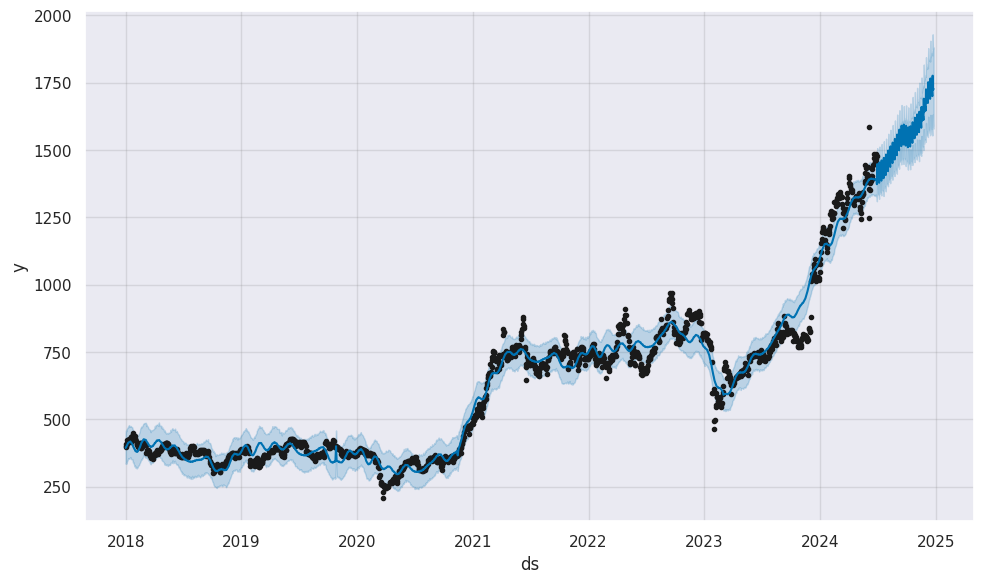

In [96]:
model.plot(prediction)
plt.show()

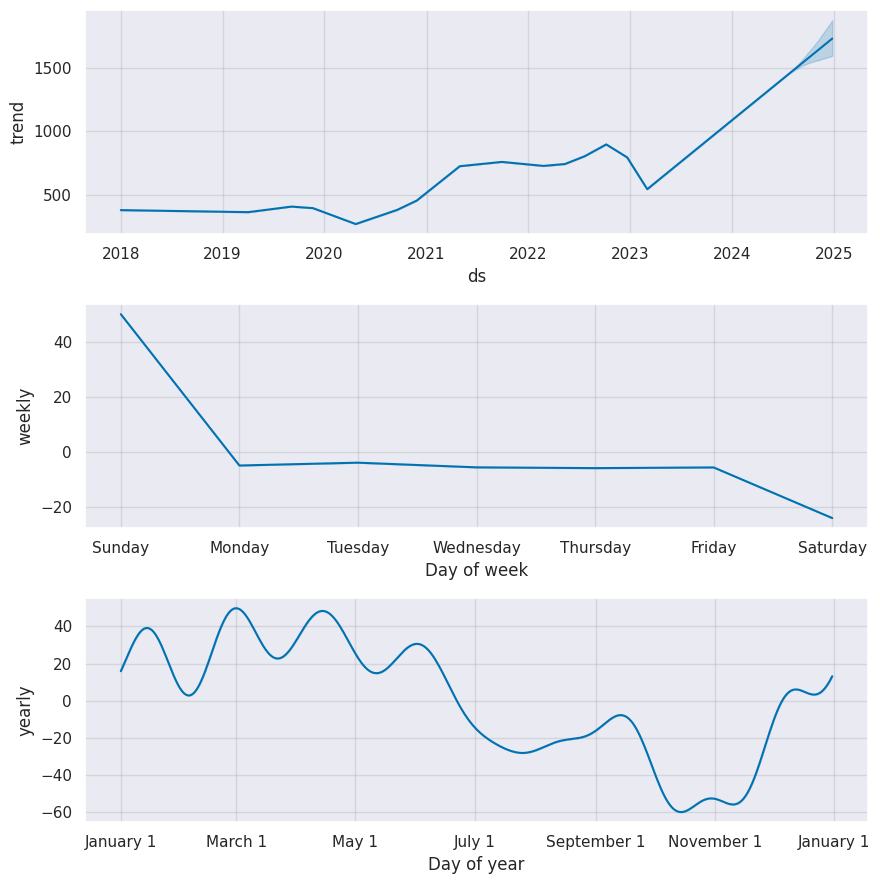

In [97]:
model.plot_components(prediction)
plt.show()